### Projeto de Embedding

Esse projeto tem como objetivo carregar um modelo do tensorflow hub e fazer uso do mesmo para embedding.
E por dizer "fazer uso do mesmo", me refiro simplesmente a realizar alguns testes com algumas palavras.
Esses testes vão compor dois níveis:

    1 - Distância de cossenos.
    2 - Aplicar PCA e plotar as frases em um gráfico.

In [6]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

#### 1 - Distância de cossenos

Abaixo serão usadas frases aleatórias com sentidos opostos.
O objetivo então será calcuar o cosseno entre os dois vetores resultante.

In [27]:
frase1 = "Deus é muito bom pra mim"
frase2 = "Eu vou orar para que Deus possa me abençoar"
frase3 = "Preciso falar com o setor financeiro"

print(np.inner(embed([frase1]),embed([frase2])))
print(np.inner(embed([frase1]),embed([frase3])))
print(np.inner(embed([frase2]),embed([frase3])))

[[0.40268084]]
[[0.10537714]]
[[0.15943472]]


In [28]:
def sim_cos(a,b):
    a = embed([a])
    a = a/np.linalg.norm(a)
    b = embed([b])
    b = b/np.linalg.norm(b)
    return np.inner(a,b)

print(sim_cos(frase1,frase2))

[[0.40268084]]


In [54]:
output = embed([frase1,frase2,frase3])''

#### Salvando tensor e metadados

Para ter um plot melhor eu usei o [projetor do tensorflow](http://projector.tensorflow.org/).
Lá eu carrego os arquivos tensor e metadata gerados na função abaixo. Com isso eu tenho um plot bem legal das palavras.

Eu exemplifiquei de forma genérica como deve ser construído os dados de entrada. 
O tensor é justamente o que representa o vetor de cada dado. 
Os metadados, obrigatoriamente, possuem um header e os dados que você quiser colocar pode definir nele.

tensor:
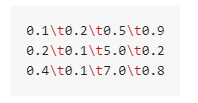

metadados:
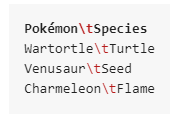

In [57]:
def save_tesor(tensor, metadata):
    output = ""
    tensor = tensor.numpy()
    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[1]):
            output += str(tensor[i,j]) + "\t"
        output += "\n"
    with open("tensor.tsv", "w") as file:
        file.write(output)
    with open("metadata.tsv", "w") as file:
        file.write("\n".join(["\t".join(row) for row in metadata]))
        
save_tesor(output, [["phrase","color"],[frase1, "red"],[frase2, "green"],[frase3, "blue"]])

#### Dados plotados

O link que eu passei acima é muito útil para aplicar PCA e ver os dados plotados em 3 dimensões. Com isso é possível fazer alguma observação dos dados. Agora a pergunta é:

Usando um embedding treinado, é possível clusterizar os dados de forma que podemos extrair intenções específicas ?

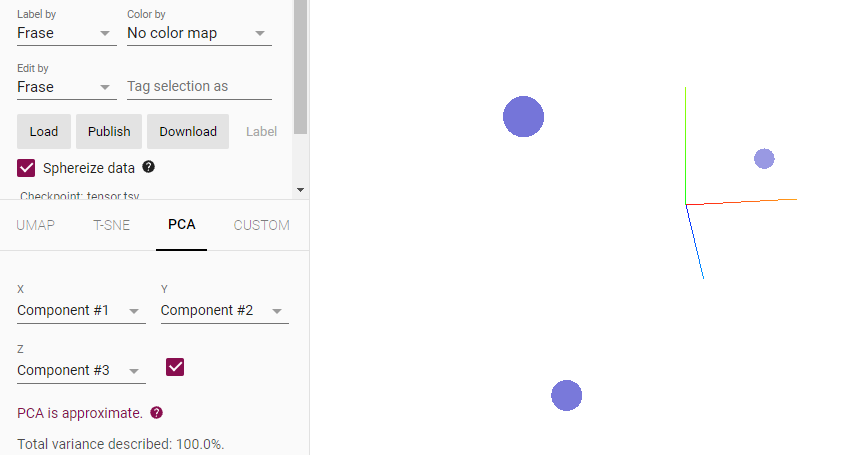